In [112]:
import parts_parser as pp


df, attrs_names = pp.load_parts('partitions.txt')
df

,groupName,partition,nodeId,primary,state,updateCounter,partitionSize,nodeAddresses,CELL
2402,test_cache_0,0,7451ec0b,P,OWNING,25,25,"127.0.0.1, 172.18.0.5",CELL-3
2403,test_cache_0,1,a669ba55,P,OWNING,28,28,"127.0.0.1, 172.18.0.20",CELL-5
2408,test_cache_0,2,5aecd2bf,P,OWNING,28,28,"127.0.0.1, 172.18.0.10",CELL-7
2410,test_cache_0,3,c8739069,P,OWNING,23,23,"127.0.0.1, 172.18.0.11",CELL-8
2413,test_cache_0,4,dffc0691,P,OWNING,40,40,"127.0.0.1, 172.18.0.6",CELL-5
...,...,...,...,...,...,...,...,...,...
36179,test_cache_affinity,1019,7ef8e144,P,OWNING,452,452,"127.0.0.1, 172.18.0.19",CELL-6
36181,test_cache_affinity,1020,e489054e,P,OWNING,474,474,"127.0.0.1, 172.18.0.17",CELL-2
36184,test_cache_affinity,1021,a37f9474,P,OWNING,445,445,"127.0.0.1, 172.18.0.22",CELL-4
36187,test_cache_affinity,1022,a669ba55,P,OWNING,455,455,"127.0.0.1, 172.18.0.20",CELL-5


In [151]:
parts_df = df[['groupName', 'partition', 'partitionSize']]

parts_grouped_by_group = parts_df.groupby('groupName')['partitionSize']
parts_grouped_by_group.std()

groupName
test_cache_0            5.370328
test_cache_1            7.482988
test_cache_2            9.322911
test_cache_3           10.342616
test_cache_4           12.181575
test_cache_5           13.262483
test_cache_6           14.675764
test_cache_7           14.579743
test_cache_8           16.310578
test_cache_9           16.667439
test_cache_affinity    53.592111
Name: partitionSize, dtype: float64

In [152]:
parts_grouped_by_group.mean()

groupName
test_cache_0            29.296875
test_cache_1            58.593750
test_cache_2            87.890625
test_cache_3           117.187500
test_cache_4           146.484375
test_cache_5           175.781250
test_cache_6           205.078125
test_cache_7           234.375000
test_cache_8           263.671875
test_cache_9           292.968750
test_cache_affinity    488.281250
Name: partitionSize, dtype: float64

In [153]:
zscore = lambda x: (x - x.mean()) / x.std()

parts_df.insert(3, 'partitionSize_zscore', parts_grouped_by_group.transform(zscore))
# parts_df_zscore = parts_df.drop(columns='partitionSize')

parts_df

,groupName,partition,partitionSize,partitionSize_zscore
2402,test_cache_0,0,25,-0.800114
2403,test_cache_0,1,28,-0.241489
2408,test_cache_0,2,28,-0.241489
2410,test_cache_0,3,23,-1.172531
2413,test_cache_0,4,40,1.993012
...,...,...,...,...
36179,test_cache_affinity,1019,452,-0.676989
36181,test_cache_affinity,1020,474,-0.266480
36184,test_cache_affinity,1021,445,-0.807605
36187,test_cache_affinity,1022,455,-0.621010


In [154]:
parts_df[parts_df.partitionSize_zscore > 3]

,groupName,partition,partitionSize,partitionSize_zscore
2489,test_cache_0,29,48,3.482678
2608,test_cache_0,69,49,3.668887
3339,test_cache_0,313,47,3.296470
3569,test_cache_0,389,49,3.668887
4874,test_cache_0,824,50,3.855095
7558,test_cache_1,695,84,3.395201
9474,test_cache_2,310,116,3.015086
10180,test_cache_2,545,119,3.336874
13315,test_cache_3,566,150,3.172553
13406,test_cache_3,596,156,3.752677


In [155]:
parts_df[parts_df.partitionSize_zscore < -3]

,groupName,partition,partitionSize,partitionSize_zscore
5956,test_cache_1,161,34,-3.286622
11100,test_cache_2,852,59,-3.098885
13355,test_cache_3,579,84,-3.208811
13695,test_cache_3,693,80,-3.595560
17894,test_cache_5,44,133,-3.225735
22813,test_cache_6,660,160,-3.071603
32057,test_cache_9,669,241,-3.117981


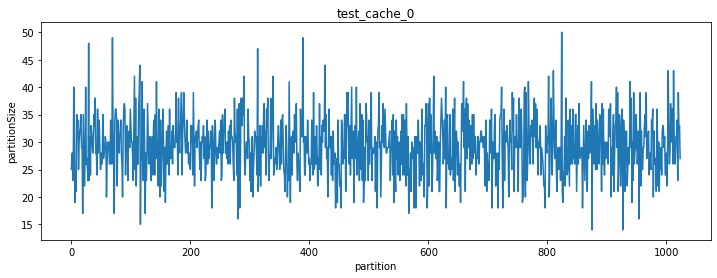

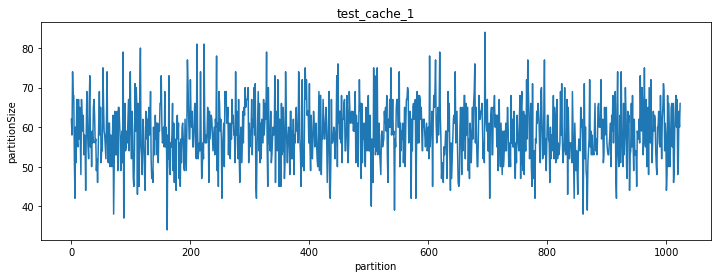

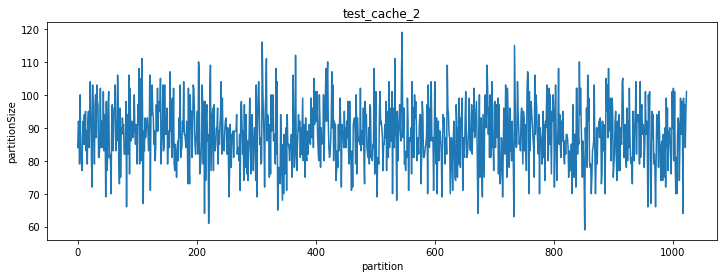

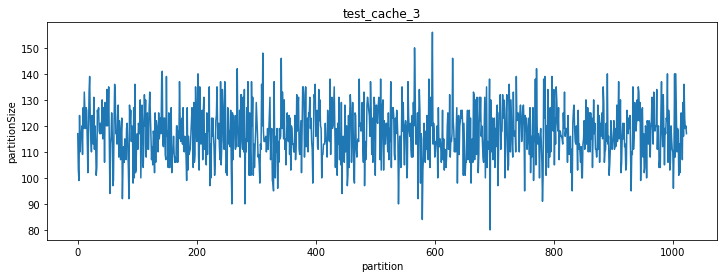

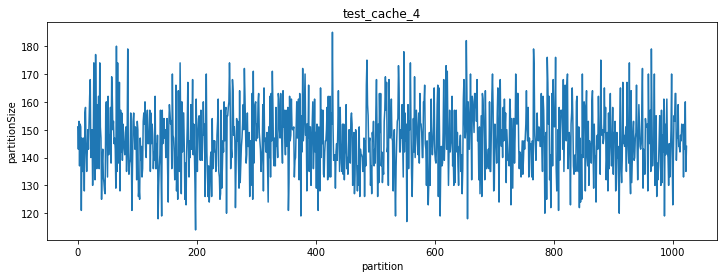

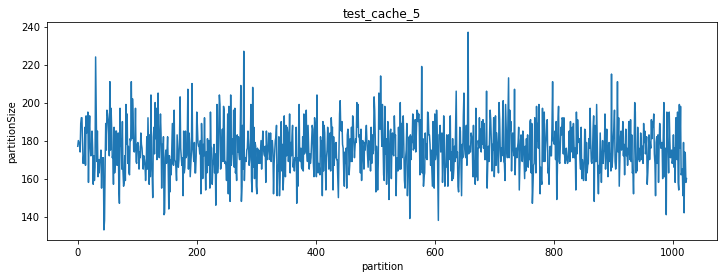

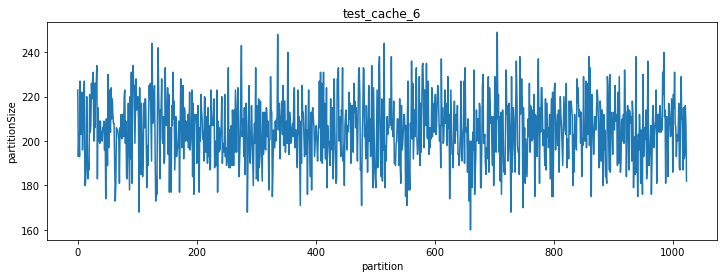

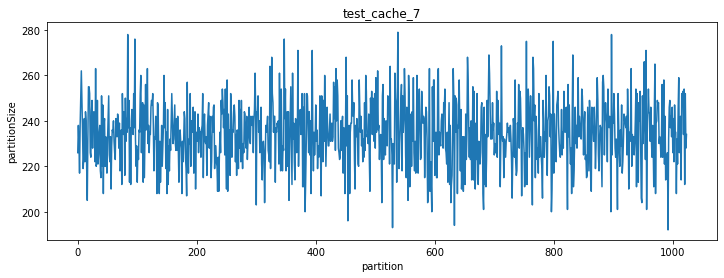

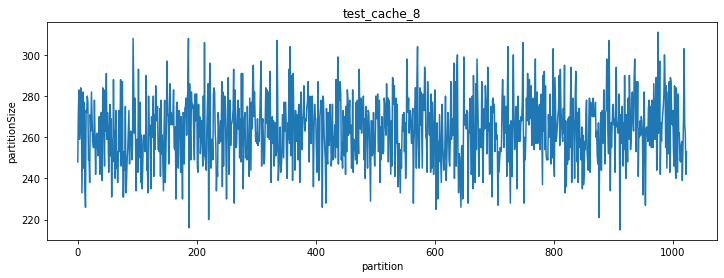

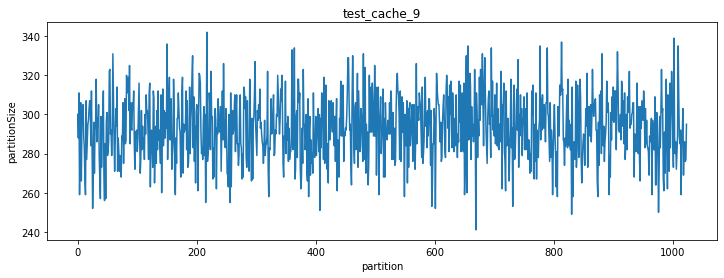

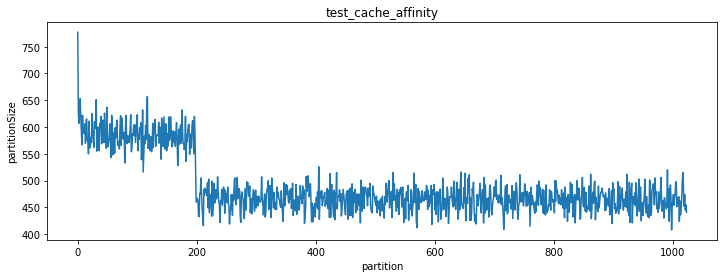

In [163]:
import matplotlib.pyplot as plt


%matplotlib inline

grouped_by_cache_group = parts_df.groupby(['groupName'])

for name, group in grouped_by_cache_group:
    group.plot(x='partition', 
               y='partitionSize', 
               ylabel='partitionSize', 
               title=name, 
               legend=None,
               figsize=(12,4))

In [164]:
import numpy as np
import pandas as pd


table_by_nodes = pd.pivot_table(df[['groupName', 'nodeAddresses', 'partitionSize']], 
               index='groupName',
               columns='nodeAddresses',
               values='partitionSize', 
               aggfunc=np.sum)
table_by_nodes

nodeAddresses,"127.0.0.1, 172.18.0.10","127.0.0.1, 172.18.0.11","127.0.0.1, 172.18.0.12","127.0.0.1, 172.18.0.13","127.0.0.1, 172.18.0.14","127.0.0.1, 172.18.0.15","127.0.0.1, 172.18.0.16","127.0.0.1, 172.18.0.17","127.0.0.1, 172.18.0.18","127.0.0.1, 172.18.0.19",...,"127.0.0.1, 172.18.0.23","127.0.0.1, 172.18.0.24","127.0.0.1, 172.18.0.25","127.0.0.1, 172.18.0.3","127.0.0.1, 172.18.0.4","127.0.0.1, 172.18.0.5","127.0.0.1, 172.18.0.6","127.0.0.1, 172.18.0.7","127.0.0.1, 172.18.0.8","127.0.0.1, 172.18.0.9"
groupName,,,,,,,,,,,,,,,,,,,,,
test_cache_0,1379,1284,1137,1480,1341,1422,1299,1138,1411,1363,...,1007,1440,1082,1356,1431,1277,1129,1045,1153,885
test_cache_1,2683,2683,2333,2906,2598,2818,2476,2265,2840,2616,...,2002,2851,2202,2635,2913,2554,2232,2041,2409,1771
test_cache_2,3904,4014,3475,4367,3832,4197,3677,3231,4221,3940,...,2991,4292,3377,3934,4376,3915,3397,3177,3659,2796
test_cache_3,5168,5065,4701,5837,5169,5526,5124,4511,5769,5233,...,4047,5825,4510,5301,5794,5204,4509,4208,4775,3636
test_cache_4,6659,6517,6011,7127,6408,7120,6284,5488,7174,6509,...,5181,7136,5501,6729,7186,6375,5662,5330,6162,4628
test_cache_5,7909,7765,7039,8918,7740,8550,7560,6868,8587,7746,...,6136,8509,6698,8005,8574,7681,6499,6340,7209,5523
test_cache_6,9348,9098,8122,10254,9020,10078,8899,7757,9961,9229,...,7123,10078,7833,9140,9984,9075,7751,7243,8335,6198
test_cache_7,10553,10318,9382,11784,10250,11380,10093,8937,11644,10558,...,8165,11314,8830,10516,11476,10402,8838,8477,9566,7230
test_cache_8,11869,11473,10457,13237,11629,12612,11371,10269,12696,11854,...,9323,12834,10061,11786,13034,11477,10193,9380,10832,8020


In [166]:
table_by_nodes_zscores = table_by_nodes.transform(zscore)

In [167]:
table_by_nodes_zscores.unstack().loc[lambda x: x > 1.3]

nodeAddresses           groupName          
127.0.0.1, 172.18.0.10  test_cache_affinity    2.262238
127.0.0.1, 172.18.0.11  test_cache_affinity    2.330350
127.0.0.1, 172.18.0.12  test_cache_affinity    2.315161
127.0.0.1, 172.18.0.13  test_cache_affinity    2.266433
127.0.0.1, 172.18.0.14  test_cache_affinity    2.258121
127.0.0.1, 172.18.0.15  test_cache_affinity    2.290059
127.0.0.1, 172.18.0.16  test_cache_affinity    2.322989
127.0.0.1, 172.18.0.17  test_cache_affinity    2.298663
127.0.0.1, 172.18.0.18  test_cache_affinity    2.274282
127.0.0.1, 172.18.0.19  test_cache_affinity    2.289057
127.0.0.1, 172.18.0.2   test_cache_affinity    2.270651
127.0.0.1, 172.18.0.20  test_cache_affinity    2.303908
127.0.0.1, 172.18.0.21  test_cache_affinity    2.292232
127.0.0.1, 172.18.0.22  test_cache_affinity    2.254256
127.0.0.1, 172.18.0.23  test_cache_affinity    2.340534
127.0.0.1, 172.18.0.24  test_cache_affinity    2.274455
127.0.0.1, 172.18.0.25  test_cache_affinity    2.303001
127.

In [170]:
table_by_nodes_zscores.unstack().loc[lambda x: x < -1.3]

Series([], dtype: float64)

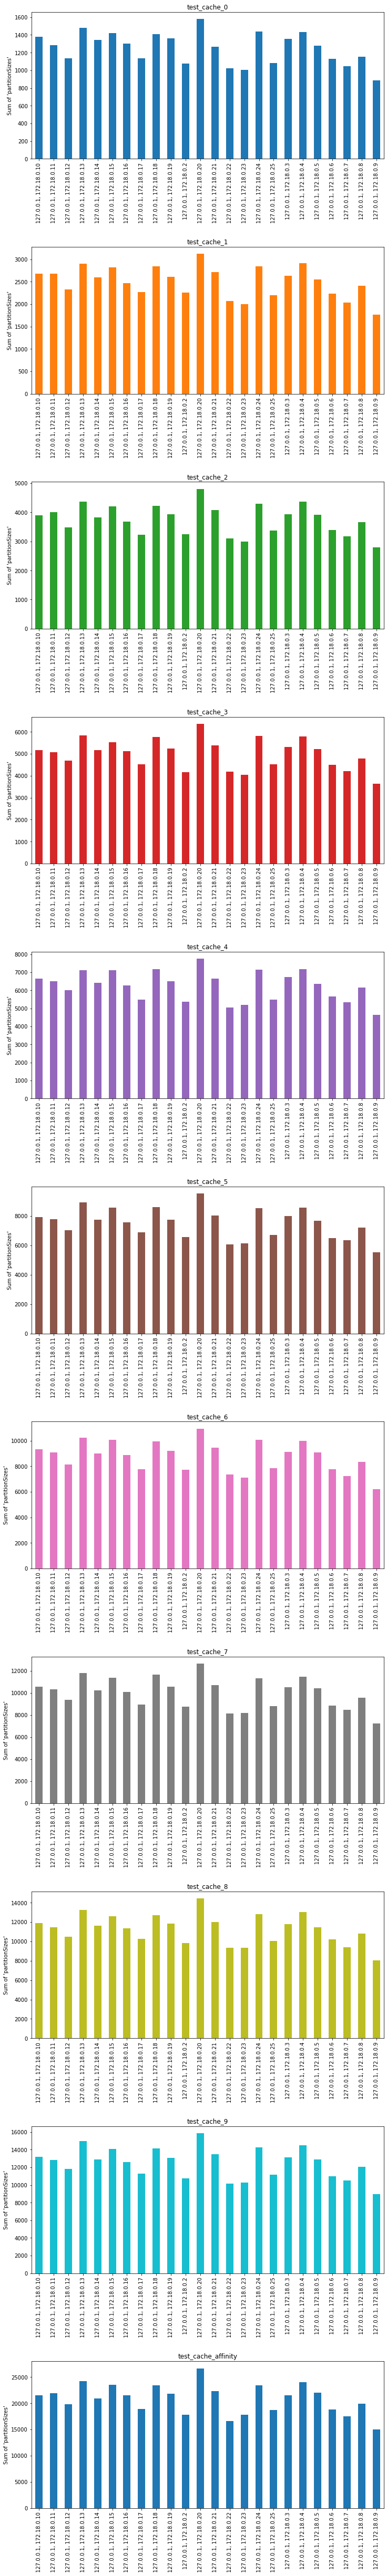

In [171]:
ylabel_part_sizes = "Sum of 'partitionSizes'"

if len(table_by_nodes) < 6:
    table_by_nodes.plot(kind='bar', 
                        figsize=(12, 10), 
                        ylabel=ylabel_part_sizes)
else:
    table_by_nodes.T.plot(kind='bar', 
                          figsize=(12, 10 * len(table_by_nodes)), 
                          ylabel=ylabel_part_sizes,
                          xlabel="",
                          subplots=True, 
                          legend=None,
                          sharex=False)

    plt.subplots_adjust(hspace=0.6, top=0.9, bottom=0.3)

In [172]:
cols = ['groupName']
cols += attrs_names
cols.append('partitionSize')

print(cols)

table_by_attributes = pd.pivot_table(df[cols], 
                                     index='groupName',
                                     columns=attrs_names,
                                     values='partitionSize', 
                                     aggfunc=np.sum)
table_by_attributes

['groupName', 'CELL', 'partitionSize']


CELL,CELL-1,CELL-2,CELL-3,CELL-4,CELL-5,CELL-6,CELL-7,CELL-8
groupName,,,,,,,,
test_cache_0,3899,3971,3503,3421,4140,4102,3591,3373
test_cache_1,8036,7923,6923,6747,8268,7943,7273,6887
test_cache_2,12097,11649,10543,10216,12582,11909,10622,10382
test_cache_3,15992,15806,14009,13694,16670,16182,14025,13622
test_cache_4,19946,19782,17411,17099,20604,19929,18030,17199
test_cache_5,24136,24005,20944,20409,24586,23815,21506,20599
test_cache_6,28042,27796,24293,23727,28691,28206,25191,24054
test_cache_7,32062,31961,27882,27129,32984,31965,28704,27313
test_cache_8,36063,35577,31126,30519,37662,36059,32137,30857


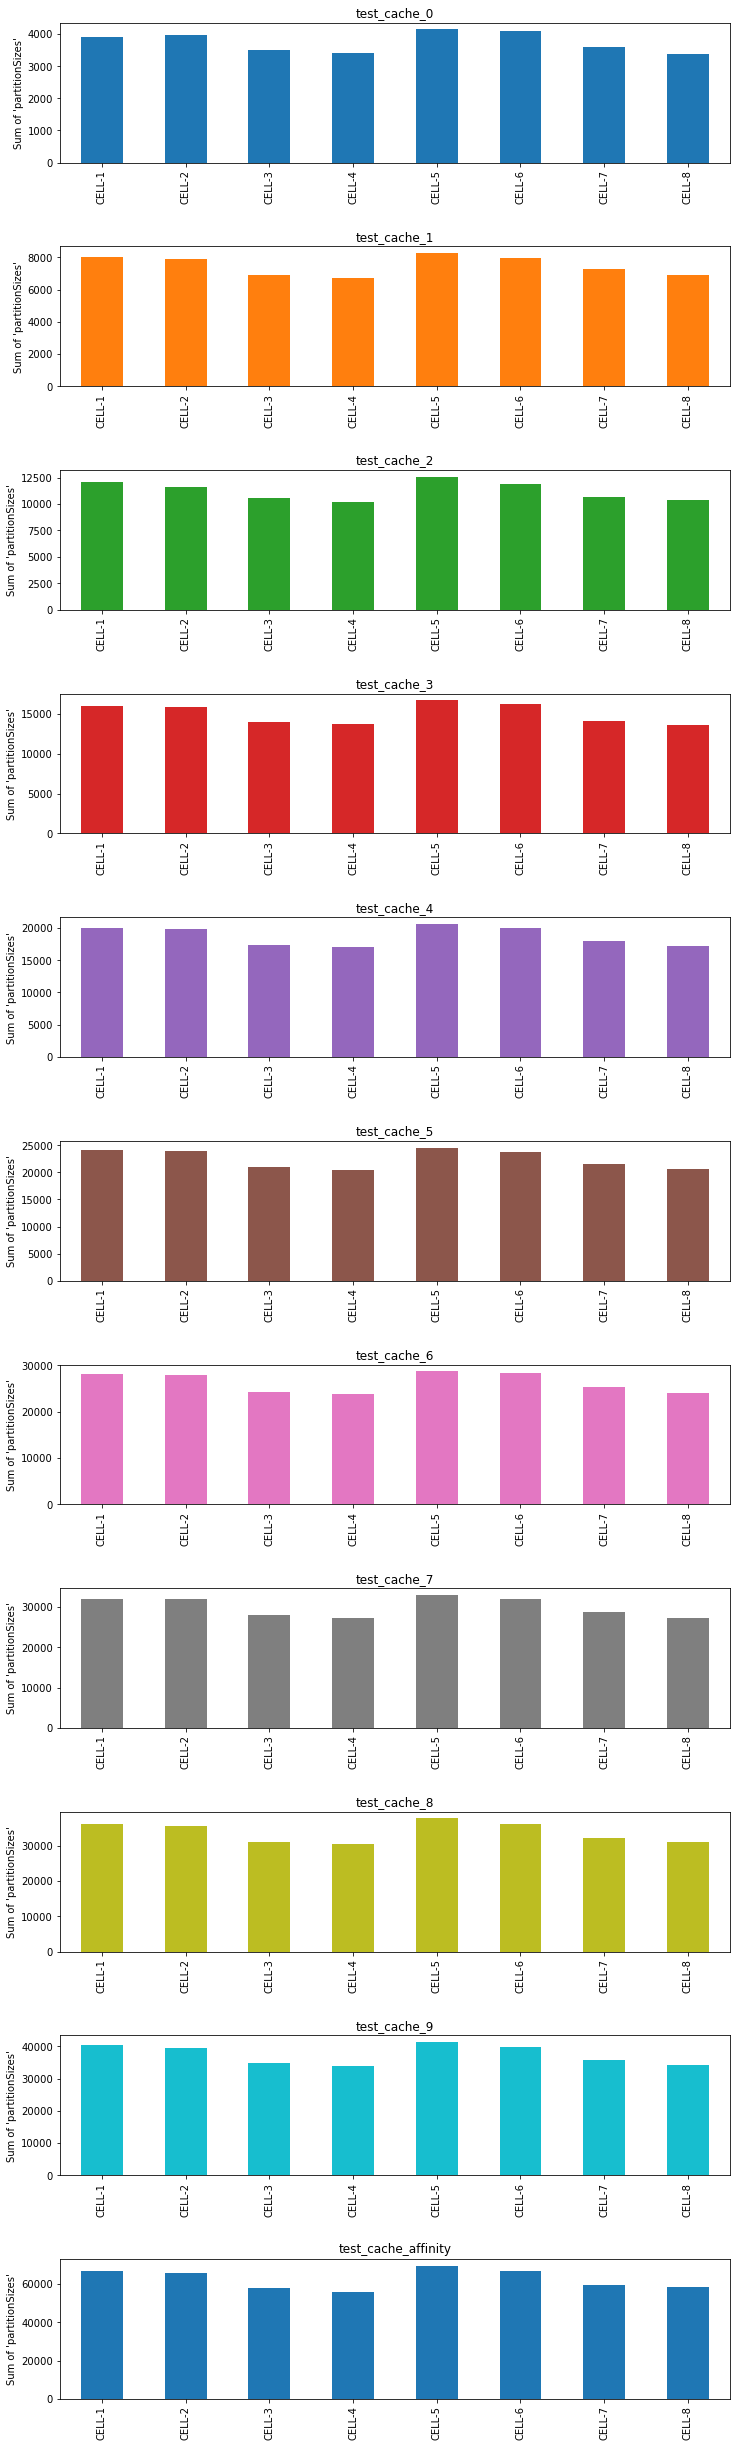

In [173]:
if len(table_by_attributes) < 6:
    table_by_attributes.plot(kind='bar', figsize=(12, 10), ylabel=ylabel_part_sizes)
else:
    table_by_attributes.T.plot(kind='bar',
                               figsize=(12, 5 * len(table_by_attributes)), 
                               ylabel=ylabel_part_sizes,
                               xlabel="",
                               subplots=True, 
                               legend=None,
                               sharex=False)

    plt.subplots_adjust(hspace=0.6, top=0.9, bottom=0.3)